Load Diabetes Dataset.
It has 10 dimensions.
Commnent from scikit-learn:
Each of these 10 feature variables have been mean centered and scaled by the standard deviation times 

In [207]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes 

dataset = load_diabetes()
names =  dataset.feature_names
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
y=dataset.target

print(df.head(20))
print(y)

print("df_shape:",df.shape)
print("df_dtypes:",df.dtypes)


      age    sex    bmi     bp     s1         s2         s3     s4     s5  \
0   0.038  0.051  0.062  0.022 -0.044 -3.482e-02 -4.340e-02 -0.003  0.020   
1  -0.002 -0.045 -0.051 -0.026 -0.008 -1.916e-02  7.441e-02 -0.039 -0.068   
2   0.085  0.051  0.044 -0.006 -0.046 -3.419e-02 -3.236e-02 -0.003  0.003   
3  -0.089 -0.045 -0.012 -0.037  0.012  2.499e-02 -3.604e-02  0.034  0.023   
4   0.005 -0.045 -0.036  0.022  0.004  1.560e-02  8.142e-03 -0.003 -0.032   
5  -0.093 -0.045 -0.041 -0.019 -0.069 -7.929e-02  4.128e-02 -0.076 -0.041   
6  -0.045  0.051 -0.047 -0.016 -0.040 -2.480e-02  7.788e-04 -0.039 -0.063   
7   0.064  0.051 -0.002  0.067  0.091  1.089e-01  2.287e-02  0.018 -0.036   
8   0.042  0.051  0.062 -0.040 -0.014  6.202e-03 -2.867e-02 -0.003 -0.015   
9  -0.071 -0.045  0.039 -0.033 -0.013 -3.451e-02 -2.499e-02 -0.003  0.068   
10 -0.096 -0.045 -0.084  0.008 -0.103 -9.056e-02 -1.395e-02 -0.076 -0.063   
11  0.027  0.051  0.018 -0.033 -0.007  4.597e-02 -6.549e-02  0.071 -0.096   

So at this point we have seen our data. We have 10 features all numerical. The y - target value is numerical
and represent the measure of disease progression one year after baseline. Below with the describe method we get 8 statistical properties for each attribute

  
describe() returns 8 statistical properties for each attribute

    Count: how many values the attribute has
    Mean: the mean of all values of the attribute
    Standard Deviation: the amount of variation values have. Low σ means values are closer to the mean
    Minimum value
    25th Percentile: the value under which 25% of the instances can be found
    50th Percentile: the value under which 50% of the instances can be found (also called the median, is the value that splits the distribution in half)
    75th Percentile: the value under which 75% of the instances can be found
    Maximum value




In [208]:
pd.set_option('precision', 3)
df.describe()




,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02
mean,-3.634e-16,1.308e-16,-8.045e-16,1.282e-16,-8.835e-17,1.327e-16,-4.575e-16,3.777e-16,-3.831e-16,-3.413e-16
std,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02
min,-1.072e-01,-4.464e-02,-9.028e-02,-1.124e-01,-1.268e-01,-1.156e-01,-1.023e-01,-7.639e-02,-1.261e-01,-1.378e-01
25%,-3.730e-02,-4.464e-02,-3.423e-02,-3.666e-02,-3.425e-02,-3.036e-02,-3.512e-02,-3.949e-02,-3.325e-02,-3.318e-02
50%,5.383e-03,-4.464e-02,-7.284e-03,-5.671e-03,-4.321e-03,-3.819e-03,-6.584e-03,-2.592e-03,-1.948e-03,-1.078e-03
75%,3.808e-02,5.068e-02,3.125e-02,3.564e-02,2.836e-02,2.984e-02,2.931e-02,3.431e-02,3.243e-02,2.792e-02
max,1.107e-01,5.068e-02,1.706e-01,1.320e-01,1.539e-01,1.988e-01,1.812e-01,1.852e-01,1.336e-01,1.356e-01


In [209]:
# an example grouping by sex attribute
df.groupby('sex').size()

sex
-0.045    235
 0.051    207
dtype: int64

In [210]:
#the correlation between attributes. For example s4 is positive correlated with s2 and s3 negative correlated with s4
df.corr(method='pearson')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
sex,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
bmi,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
bp,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
s1,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
s2,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
s3,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
s4,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
s5,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465
s6,0.302,0.208,0.389,0.390,0.326,0.291,-0.274,0.417,0.465,1.000


In [211]:
#Skew of Univariate Distributions

df.skew()

age   -0.231
sex    0.127
bmi    0.598
bp     0.291
s1     0.378
s2     0.437
s3     0.799
s4     0.735
s5     0.292
s6     0.208
dtype: float64

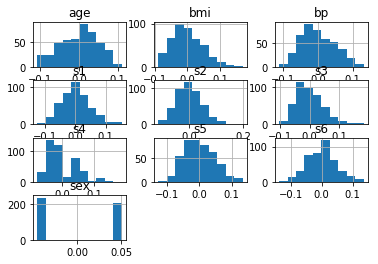

In [212]:
#univariate plots for our attributes
#Histogram Plots
# Age, bmi,bp,s1,s2,s3, s5 and s6 follow ~Normal Distirbution.
h = df.hist()
plt.show()

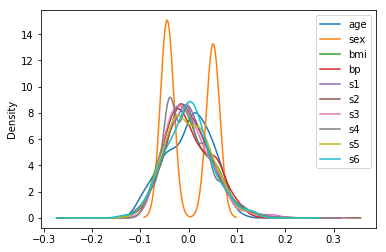

In [213]:
#Density Plots
df.plot(kind='density', layout=(10,10), sharex=False)
plt.show()

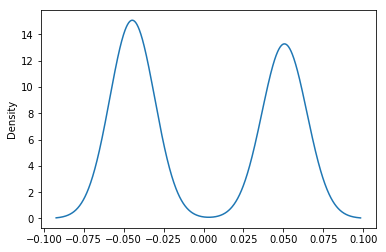

In [214]:
#Density Plots- plot only for Sex attr.
df1 = df['sex']
df1.plot(kind='density', layout=(10,10), sharex=False)
plt.show()

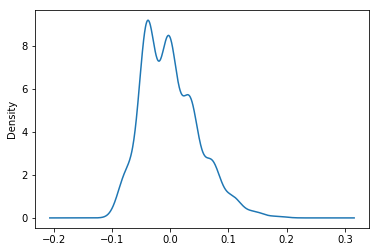

In [215]:
#Density Plots- plot only for s4 attr.
df1 = df['s4']
df1.plot(kind='density', layout=(10,10), sharex=False)
plt.show()

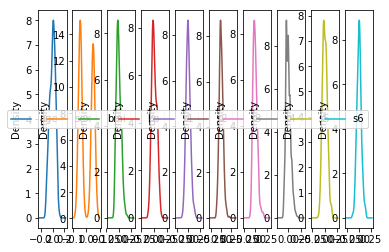

In [216]:
#Density Plots
df.plot(kind='density', subplots=True, layout=(1,10), sharex=False)
plt.show()

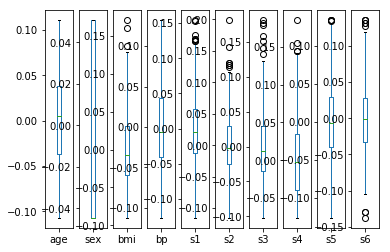

In [217]:
bp = df.plot(kind='box', subplots=True, layout=(1,10), sharex=False)
plt.show()

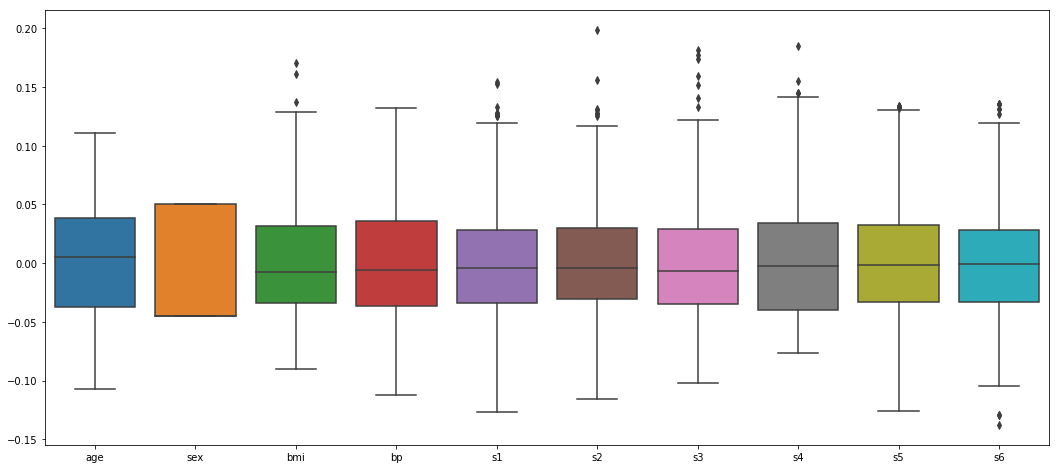

In [218]:
# Using seaborn
f = plt.figure(figsize=(18,8))
sns.boxplot(data=df)

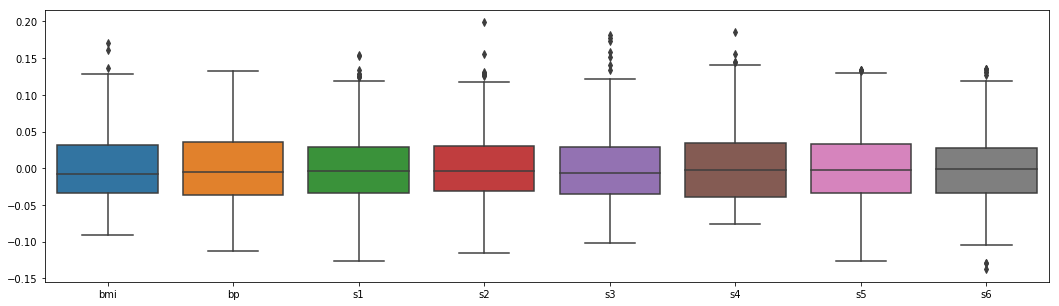

In [219]:
stats_df = df.drop(['age', 'sex'], axis=1)
plt.figure(figsize=(18,5))
sns.boxplot(data=stats_df)

In [220]:
test_df = df[['age']]
test_df.head()

,age
0,0.038
1,-0.002
2,0.085
3,-0.089
4,0.005


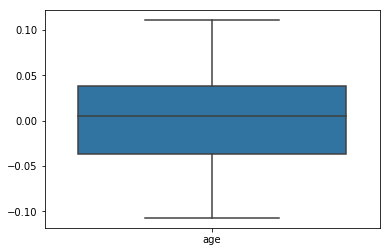

In [221]:
sns.boxplot(data=test_df)

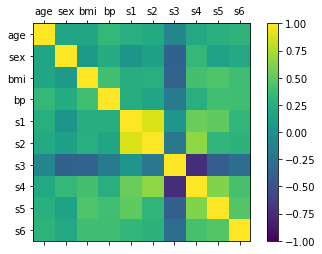

In [222]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

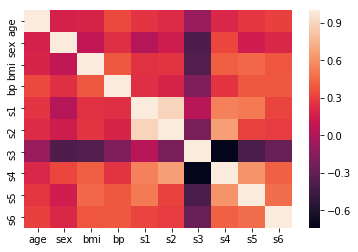

In [223]:
# In seaborn we can use a heatmap:
# Heatmap
sns.heatmap(correlations)

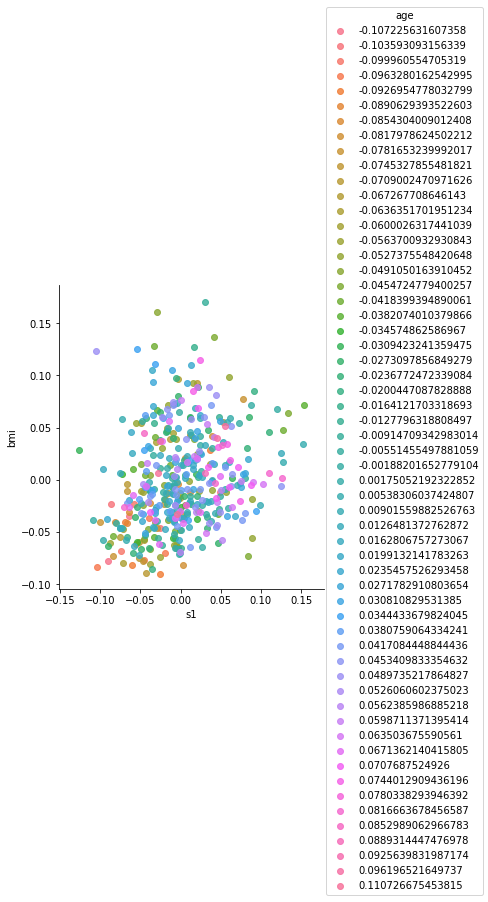

In [224]:
sns.lmplot(data=df, y='bmi', x='s1', hue='age', fit_reg=False)

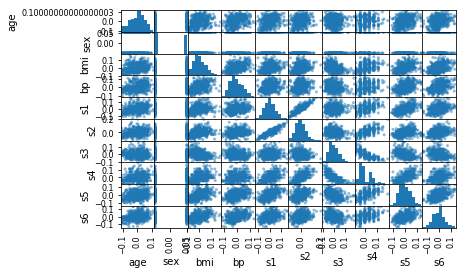

In [225]:

from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()


Data preparation

In [226]:
from numpy import set_printoptions
array = df.values
# separate array into input and output components
X = array[:,0:10]
Y = y
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.667 1.    0.583 0.549 0.294 0.257 0.208 0.282 0.562 0.439]
 [0.483 0.    0.149 0.352 0.422 0.307 0.623 0.141 0.222 0.167]
 [0.883 1.    0.517 0.437 0.289 0.259 0.247 0.282 0.497 0.409]
 [0.083 0.    0.302 0.31  0.495 0.447 0.234 0.423 0.573 0.47 ]
 [0.517 0.    0.207 0.549 0.466 0.417 0.39  0.282 0.362 0.333]]


In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X) 
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.801  1.065  1.297  0.46  -0.93  -0.732 -0.912 -0.054  0.419 -0.371]
 [-0.04  -0.939 -1.082 -0.554 -0.178 -0.403  1.564 -0.83  -1.437 -1.938]
 [ 1.793  1.065  0.935 -0.119 -0.959 -0.719 -0.68  -0.054  0.06  -0.545]
 [-1.872 -0.939 -0.244 -0.771  0.256  0.525 -0.758  0.721  0.477 -0.197]
 [ 0.113 -0.939 -0.765  0.46   0.083  0.328  0.171 -0.054 -0.673 -0.981]]


In [228]:
# Normalise data (length of 1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])


[[ 0.321  0.427  0.52   0.184 -0.373 -0.294 -0.366 -0.022  0.168 -0.149]
 [-0.012 -0.277 -0.319 -0.163 -0.052 -0.119  0.461 -0.245 -0.423 -0.571]
 [ 0.657  0.391  0.343 -0.044 -0.351 -0.264 -0.249 -0.02   0.022 -0.2  ]
 [-0.721 -0.361 -0.094 -0.297  0.099  0.202 -0.292  0.278  0.184 -0.076]
 [ 0.063 -0.521 -0.424  0.255  0.046  0.182  0.095 -0.03  -0.373 -0.544]]


In [229]:
# binarisation
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=3.0).fit(X)
binaryX = binarizer.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [230]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
dtypes: float64(10)
memory usage: 34.7 KB


In [231]:
array = df.values
X = array[:,0:10]
Y = y
kfold = KFold(n_splits=10, random_state=7)


In [232]:
from sklearn.linear_model import LinearRegression
results = cross_val_score(LinearRegression(), X, Y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-3000.3810328390514


In [233]:
from sklearn.linear_model import Ridge
results = cross_val_score(Ridge(), X, Y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-3364.531013404817


In [234]:
from sklearn.linear_model import Lasso
results = cross_val_score(Lasso(), X, Y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-3860.352419328005


In [235]:
from sklearn.linear_model import ElasticNet
results = cross_val_score(ElasticNet(), X, Y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-5915.070792402168


In [236]:
from sklearn.neighbors import KNeighborsRegressor
results = cross_val_score(KNeighborsRegressor(), X, Y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-3764.7386141414145


In [237]:
from sklearn.tree import DecisionTreeRegressor
results = cross_val_score(DecisionTreeRegressor(), X, Y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-6720.666212121212


In [238]:
from sklearn.svm import SVR
results = cross_val_score(SVR(), X, Y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean()) ;# prints the (minus) mean squared error

-6059.385995257355


In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNN',     KNeighborsRegressor()))
models.append(('DT',      DecisionTreeRegressor()))
models.append(('SVM',     SVR()))

In [240]:
# The scoring function to use
scoring = 'neg_mean_squared_error'

In [241]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
namesmodel   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  namesmodel.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -3000.381033 (+/- 681.774059)
     RIDGE: -3364.531013 (+/- 608.463461)
     LASSO: -3860.352419 (+/- 675.547788)
   ELASTIC: -5915.070792 (+/- 1154.607088)
       kNN: -3764.738614 (+/- 743.102896)
        DT: -6842.012121 (+/- 1430.771327)
       SVM: -6059.385995 (+/- 1322.884323)


In [242]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)


[0.112 0.016 0.117 0.11  0.114 0.106 0.115 0.085 0.11  0.116]


In [243]:
print("")
for x,y in zip(names, model.feature_importances_):
    print("Feature: "+x+" importance: ",y)



Feature: age importance:  0.1118197058790404
Feature: sex importance:  0.015557020176283229
Feature: bmi importance:  0.11740107418319659
Feature: bp importance:  0.11021809507829357
Feature: s1 importance:  0.1137799326999547
Feature: s2 importance:  0.10644141170681853
Feature: s3 importance:  0.11458250914872285
Feature: s4 importance:  0.08515138328998496
Feature: s5 importance:  0.10950244526274552
Feature: s6 importance:  0.1155464225749597


Automatically created module for IPython interactive environment
Feature ranking:
1. feature 1 (0.184797)
2. feature 0 (0.178089)
3. feature 2 (0.156096)
4. feature 4 (0.073441)
5. feature 7 (0.072168)
6. feature 5 (0.069860)
7. feature 9 (0.068205)
8. feature 3 (0.066873)
9. feature 6 (0.066523)
10. feature 8 (0.063949)


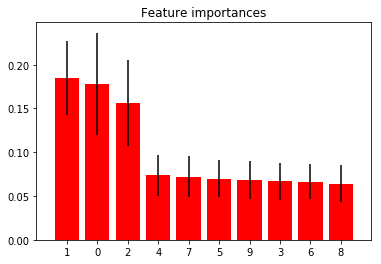

In [244]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=442,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [245]:
results = []
namesmodel   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  namesmodel.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -3000.381033 (+/- 681.774059)
     RIDGE: -2998.107268 (+/- 673.798766)
     LASSO: -2988.277498 (+/- 651.453235)
   ELASTIC: -3136.103990 (+/- 587.719079)
       kNN: -3764.738614 (+/- 743.102896)
        DT: -6856.423333 (+/- 1317.882654)
       SVM: -4889.343322 (+/- 1012.464799)


In [246]:
results = []
namesmodel   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, normalizedX, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  namesmodel.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -3075.579989 (+/- 514.288027)
     RIDGE: -3057.926481 (+/- 503.694026)
     LASSO: -3072.597718 (+/- 483.810767)
   ELASTIC: -4481.869886 (+/- 809.395706)
       kNN: -3479.251505 (+/- 590.413144)
        DT: -7093.631818 (+/- 1710.812171)
       SVM: -5299.494784 (+/- 1124.446647)


<IPython.core.display.Javascript object>


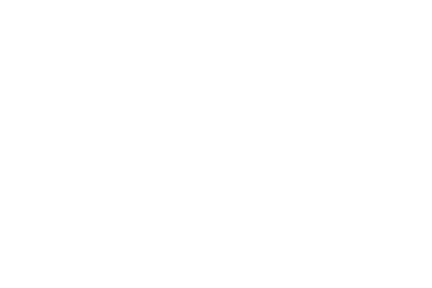

<IPython.core.display.Javascript object>


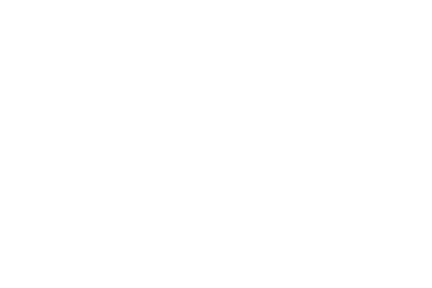

In [247]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

In [248]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X, Y)
# print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)


-0.041631942682484796
1.0


In [249]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)


-0.04163755097839347
0.9779895119966027


In [250]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV took 12.74 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.932 (std: 0.009)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.926 (std: 0.008)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.921 (std: 0.009)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}



In [251]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


GridSearchCV took 104.28 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.936 (std: 0.004)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 1
Mean validation score: 0.936 (std: 0.004)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.935 (std: 0.010)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

